#Detecção de Fraudes em Cartões de Crédito
*by [Gabriel Reversi](https://www.linkedin.com/in/gabriel-reversi-130b15138/)*


Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e fintechs. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.



<p align=center>
<img src="https://www.bertholdo.com.br/blog/wp-content/uploads/2018/12/fraudes-no-ecommerce-veja-as-4-mais-comuns-e-como-evitalas.jpeg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

#Importação dos Dados
Os dados que utilizaremos nesse projeto foram disponibilizados por uma emrpesa europeia de cartão de crédito. Esse conjunto de dados foi descaracterizados devido a problemas ligados a segurança e privacidade, portanto as variaveis são todas numéricas representadas por V1, V2, V3... V28.

Link da página: [Base de Dados](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
#importanto os pacotes necessario

!pip install scikit-plot -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

In [2]:
#importando dados para um dataframe

df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

#verificando a dimensão da base
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis: \t {}".format(df.shape[1]))

Entradas:	 284807
Variaveis: 	 31


In [3]:
#Criando um conjunto de teste
df_teste = df.sample(frac=0.15, random_state=0)

#removendo o conjunto de teste do original
df = df.drop(df_teste.index)

In [4]:
#verificando as novas dimensões
print("Conjunto de teste:{} \t".format(df_teste.shape))
print("Conjunto Original: {} \t".format(df.shape))

Conjunto de teste:(42721, 31) 	
Conjunto Original: (242086, 31) 	


#Análise Exploratória

Obs: Nossa variavel alvo é a coluna ***Class*** representado como:

0: Transações Normais

1: Transações Fraudulentas

In [5]:
#ver as primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Analisando as primeiras entradas podemos identificar que as variaveis ***Amount*** e ***Time*** apresentam seus valores originais e foram preservadas.

In [ ]:
#Verificando o resumo estatistico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Ao analisar o resumo estatistico o que me chama mais atenção é a coluna ***Amount***, pois podemos ver que a mesma possui valores como:

Média = 88.61

Max = 19656.53

Desvio Padrão = 247.65

Significando que a maioria das transações é composta por valores menores

In [ ]:
#verificar valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Podemos ver que não será nenhum tratamento relacionado a valores ausentes. O conjunto de dados usado está bem completo.


Outro ponto importante é a distribuição dos dados. Conforme mencionado anteriormente, a variavel alvo é ***Class***.
Podmeos ver abaixo que as transações fraudulentas representam apenas 0,17% do todo.

E isso fica ainda mais evidente quando plotamos em grafico.

In [6]:
#transações fraudulentas
print("Fraudes representam {:.2f}%".format((df[df.Class == 1].shape[0]/df.shape[0])*100))

Fraudes representam 0.17%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

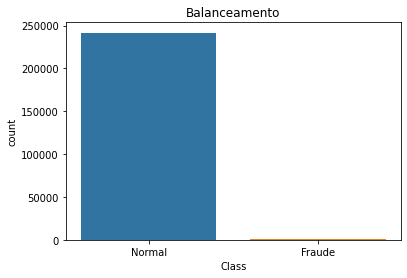

In [7]:
#Verificando distribuição da variavel Class
fig, ax = plt.subplots()
sns.countplot('Class', data=df)
ax.set_title("Balanceamento", fontsize=12)
plt.xticks([0,1],['Normal','Fraude'])
plt.plot()

Uma outra informação interessante é a visualização das classes por tempo, usando a variavel ***Time***. Para verificar a distribuição de ambas (0 e 1)

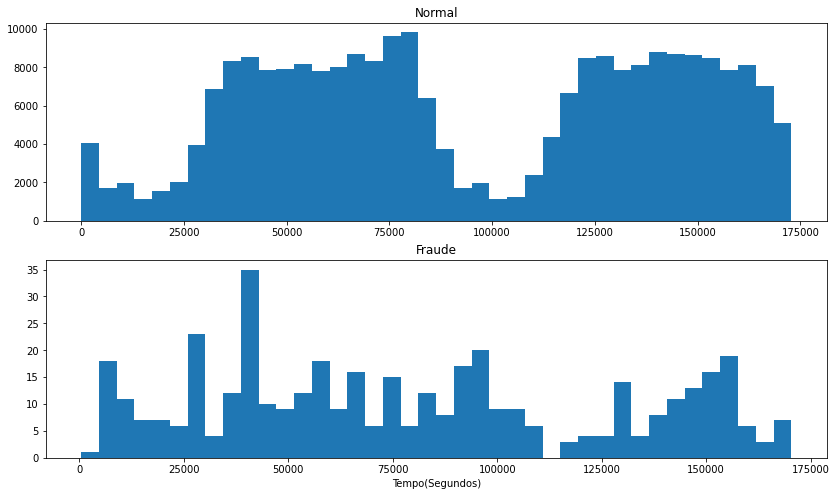

In [8]:
fig, ax=plt.subplots(ncols = 1, nrows=2,figsize=(14,8))

ax[0].hist(df.Time[df.Class ==0], bins=40)
ax[0].set_title("Normal")

ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[1].set_title("Fraude")

plt.xlabel("Tempo(Segundos)")

plt.show()

Agora iremos plotar um grafico de boxplot para verificar se há alguma diferença no padrão das transações, utilizando a variavel ***Amount***.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


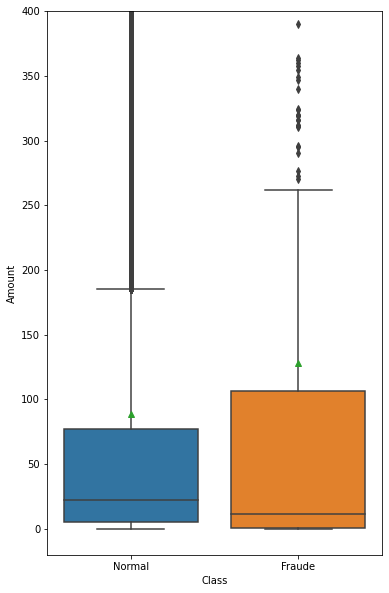

In [9]:
#Plotando grafico de boxplot
fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot('Class','Amount', data=df, ax=ax, showmeans=True)
plt.ylim(-20,400)
plt.xticks([0,1],["Normal","Fraude"])

plt.show()

Além de conseguir ver no boxplot, podemos tambem gerar com mais detalhes a estatisticas na variavel ***Amount*** para "Fraudes"

É possivel identificar que a média é 123.70, desvio padrão de 249.47 e mediana de 11.40

In [10]:
#verificando a descrição estatistica para fraude
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

##Conclusão da Analise Exploratória



*   Foi possivel identificar que os dados estão muito desbalanceados, pois as transações fraudulentas representam apenas 0.17%
*   O conjunto de dados não possui valores ausentes
*   As colunas Time e Amount não estão normalizadas



#Preparação de Dados

Nesta etapa iremos preparar os dados para que possamos usar o modelo de regressão logistica.

*   Padronizar as features ***Amount*** e ***Time***
*   Balancear os dados para evitar uma baixa performance
*   Dividir entre dados de treino e teste

In [11]:
#Padronização das colunas time e amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Amount','Time'], axis =1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


Após a padronização dos dados, iremos dividi-los em treino e teste

In [12]:
#separar variaveis entre X e y
X = df_clean.drop('Class', axis = 1)
y = df['Class']

#dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X,y,stratify=y, shuffle=True)



**Balancemaneto**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


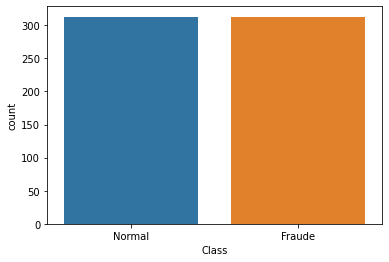

In [13]:
#usar tecnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#plotando o grafico balanceado
sns.countplot(y_rus);
plt.xticks([0,1],['Normal','Fraude'])

plt.show()

Agora com os dados balanceados podemos plotar uma matriz de correlção para saber quais variaveis estão mais relacionadas.

Observe abaixo que antes do balancemaneto a matriz de correlção não mostra obsolutamente nada:

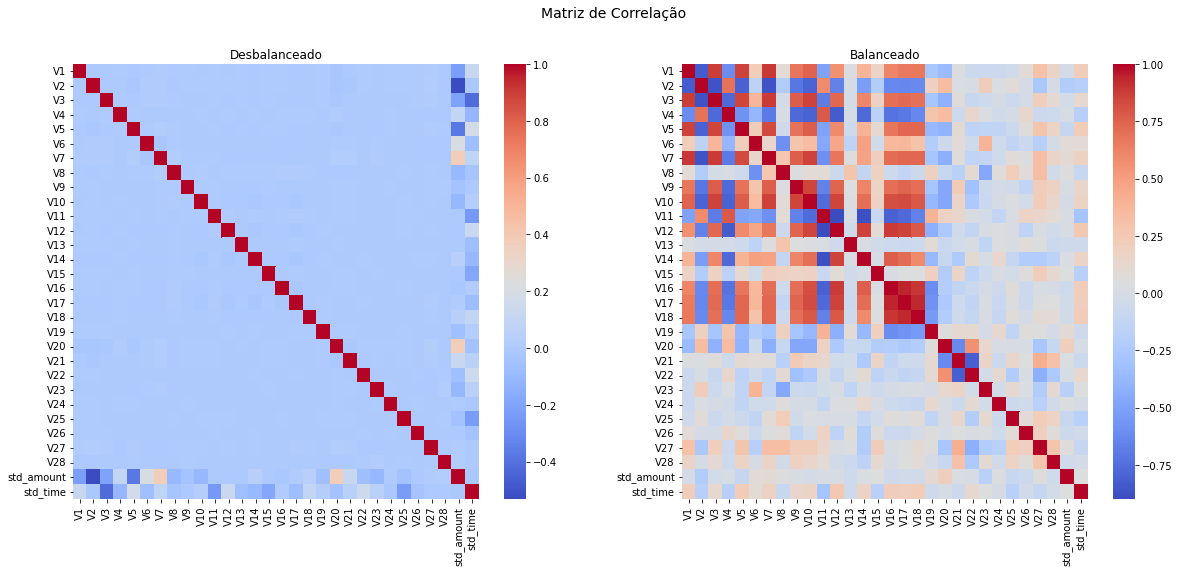

In [14]:
#Matriz de correlção
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
fig.suptitle("Matriz de Correlação", fontsize=14)

ax[0].set_title('Desbalanceado')
sns.heatmap(corr, cmap='coolwarm', ax=ax[0])

sns.heatmap(corr_rus,cmap='coolwarm', ax=ax[1])
ax[1].set_title("Balanceado")

plt.show()

#Modelo de Machine Learning

Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [15]:
#instanciar e treinar um modelo de regressão logistica
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

#Previsões com dados de treino
y_pred = model.predict(X_val)
y_proba = model.predict(X_val)

Com o modelo treinado e as previsões feitas, vamos partir para a parte de avaliar o desempenho. Precisamos saber se o modelo está tendo uma acertividade plausivel ou não.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada, pois o mesmo pode ter uma acuracia de 99% e detectar menos de 60% das fraudes.

Uma métrica interessante para avaliar a eficacia é a **AUC ROC**.

##ROC:

A curva ROC mostra a capacidade de um modelo criado de distinguir entre uma coisa e outra(Pode ser 1 e 0 ou positivo e negativo)

O ROC possui dois parâmetros:
*   Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives (true positives + false negatives)

*   Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

<p align=center>
<img src="https://ichi.pro/assets/images/max/724/1*-tPXUvvNIZDbqXP0qqYNuQ.png" width="60%"></p>

###AUC:

O valor de AUC varia entre 0,0 e 1,0. Acima de 0,5 o algoritimo classifica em uma classe e abaixo desse valor o algoritimo classifica em outra. Quanto maior o AUC melhor! 

<p align=center>
<img src="https://www.researchgate.net/profile/Heiko-Mahrholdt/publication/333702510/figure/fig2/AS:768644690759680@1560270583366/ROC-curve-cutoff-of-121-minutes-ROC-curve-AUC-081-95-CI-073-090-P00001_Q640.jpg" width="60%"></p>

**OBS:** AUC nada mais é do que um resumo da curva ROC

No caso do nosso modelo de regressão logistica, tem-se 96% de AUC



Relatório de Classificação:               precision    recall  f1-score   support

           0       1.00      0.96      0.98     60417
           1       0.04      0.91      0.08       105

    accuracy                           0.96     60522
   macro avg       0.52      0.94      0.53     60522
weighted avg       1.00      0.96      0.98     60522

Acuracia: 0.9610

AUC: 0.9377



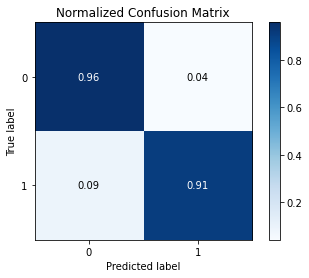

In [16]:
#Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

#Relatorio de classificação
print("Relatório de Classificação:", classification_report(y_val, y_pred))

#Acuracia do modelo
print("Acuracia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

#Fazendo Previsões com Dados de Teste

No começo deste projeto dividimos os dados em treino, validação e teste. É nesta fase que iremos utilizar o modelo com os dados de teste, pois anteriormente instanciamos o modelo e fizemos previsão com o conjunto de validação.

Para esta etapa será necessario padronizar as colunas ***Time*** e ***Amount***. Um ponto importante é que nesta fase não iremos balancear os dados pois pode haver perdas.


In [17]:
# padronizar as colunas Time e Amount - Teste
test_clean = df_teste.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


In [20]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = df_teste['Class']

In [22]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9617    0.9804     42647
           1     0.0411    0.9459    0.0787        74

    accuracy                         0.9616     42721
   macro avg     0.5205    0.9538    0.5296     42721
weighted avg     0.9982    0.9616    0.9788     42721

Acurácia: 0.9616

AUC: 0.9538



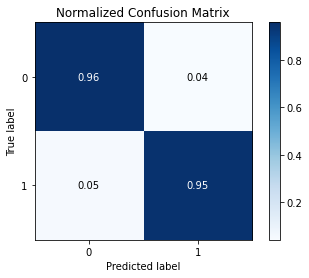

In [23]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

#Conclusão

O que podemos concluir com o ultimo resultado da avaliação do modelo:

*   O modelo teve uma acuracia de 0.96, o que significa que a cada 100 transações, 96 são identificados pelo modelo.

*   AUC de 0.95, o que significa que de 100 transações fraudulentas o modelo acertou 95, classificando-as como fraude, e as outras 5 fraudulentas ele classificou como transações normais (Precisão de 95%)

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.